In [1]:
%load_ext autoreload
%autoreload 2

import torch
import matplotlib.pyplot as plt
import numpy as np
import os
import json

import matplotlib.pyplot as plt
import imageio
import os

from PIL import Image, ImageDraw
import glob

In [2]:
runs = {

    # '2023-05-08_13-59_dummy-test': {'desc' : 'output_dummy_rot'},
    # '2023-05-08_14-31_dummy-test': {'desc' : 'output_rot'},
    # '2023-05-08-14-40_last_night': {'desc' : 'last_night'},
    '2023-05-10_12-31_dummy-test' : {'desc' : 'data_half'},
}

history_keys = {'loss_history', 'epoch_loss_history' , 'val_loss_history'}

for dir in runs:
    filename = lambda h : 'train_results/' + dir + f'/{h}.json'
    histories = {h: json.load(open(filename(h))) for h in history_keys if os.path.isfile(filename(h))}
    runs[dir]['histories'] = histories

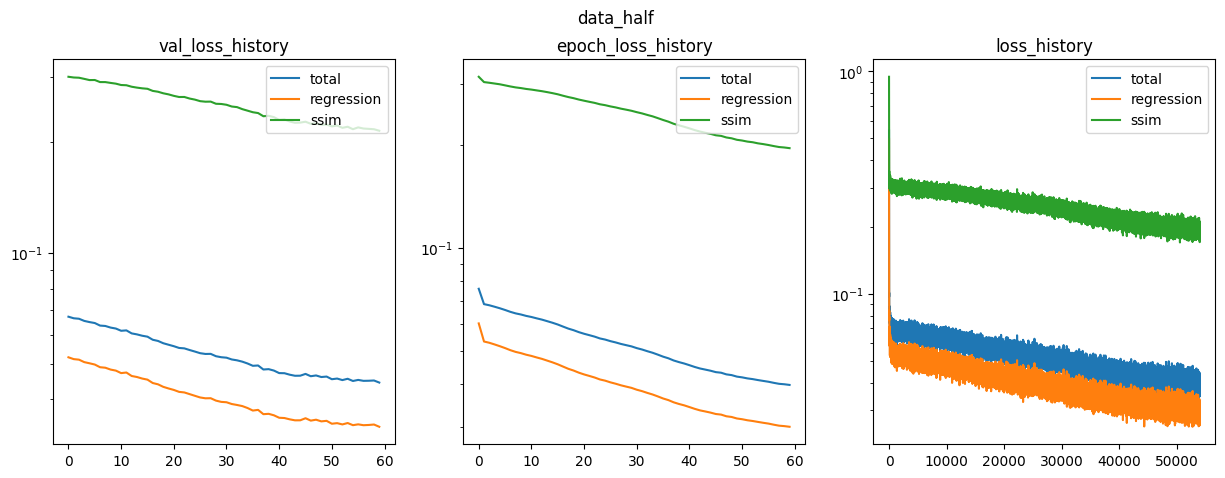

In [9]:
for dir in runs:
    histories = runs[dir]['histories']
    desc = runs[dir]['desc']

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    for i, (h, history) in enumerate(histories.items()):
        for k, loss in history.items():
            axs[i].plot(loss, label=k)
            axs[i].set_yscale('log')
        axs[i].set_title(h)
        axs[i].legend(loc = 'upper right')
    fig.suptitle(desc)
    plt.show()

# Make GIF

In [4]:
keys = list(runs.keys())
print(keys)

k = keys[0]


['2023-05-10_12-31_dummy-test']


In [7]:


# Load all PNG images in the current directory
path = os.path.join('train_results', k)
pngs = glob.glob(f"{path}/*.png")
# pngs.sort()  # sort the images alphabetically
# Load the first PNG image and get its size
first_png = Image.open(pngs[0])
first_width, first_height = first_png.size

# Define font and font size for the titles
# font = ImageFont.truetype("arial.ttf", 24)

# Create a new empty image with the size of the concatenated images, plus room for the titles
title_height = 30
total_width = first_width * 2
total_height = first_height + title_height
new_image = Image.new("RGBA", (total_width, total_height), (255, 255, 255, 255))

# Draw the "original" title on the left side of the new image
draw = ImageDraw.Draw(new_image)
title = "original"
_, _, text_width, text_height = draw.textbbox((0, 0), title, spacing=0, align='left')
# draw.text(((first_width - text_width) / 2, first_height), title, fill=(255, 0, 0, 255), fontsize = 300)
draw.text(((first_width - text_width)/2, 10), title, fill=(0, 0, 0, 255))

# Paste the first PNG image on the left side of the new image
new_image.paste(first_png, (0, title_height))

# Loop over the remaining PNG images, paste each one on the right side of the new image with a title, and append them to a list of frames
frames = []
for i, png in enumerate(pngs[1:]):
    im = Image.open(png).convert("RGBA")
    epoch_title = f"epoch {i}"
    _, _, text_width, text_height = draw.textbbox((0, 0), epoch_title, spacing=0, align='left', font=None)
    draw.rectangle(((first_width + (first_width - text_width) / 2), 0, (first_width + (first_width - text_width) / 2) + text_width, 30), fill=(255, 255, 255, 255))
    draw.text(((first_width + (first_width - text_width) / 2), 10), epoch_title, fill=(0, 0, 0, 255))
    new_image.paste(im, (first_width, title_height))
    frames.append(new_image.copy())  # append a copy of the new image to the list of frames

# Save the frames as an animated GIF
frames[0].save(os.path.join(path, "combined_images.gif"), format="GIF", append_images=frames[1:], save_all=True, duration=100, 
            #    loop=0,
               )
